In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
def load_csv_file(filename):
    return pd.read_csv(filename)
fd_train = load_csv_file("data/Train.csv")
fd_test =  load_csv_file("data/Test.csv")

In [9]:
def get_commmon_columns():
    return ['id', 'date', 'flight_id', 'departure_point', 'arrival_point', 'departure_time', 'arrival_time', 'flight_status', 'aircraft_code']

def rename_colums(fd_train, extra_columns):
    columns = get_commmon_columns() + extra_columns
    fd_train.columns = columns
    return fd_train

fd_train = rename_colums(fd_train, ["target"])
fd_test = rename_colums(fd_test,[])

In [15]:
def add_column_duration(fd_train):
    fd_train['departure_time'] = pd.to_datetime(fd_train['departure_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    fd_train['arrival_time'] = pd.to_datetime(fd_train['arrival_time'], format='%Y-%m-%d %H.%M.%S', errors='coerce')
    fd_train['duration'] = (pd.to_datetime(fd_train['arrival_time']) - pd.to_datetime(fd_train['departure_time'])).dt.total_seconds()
    return fd_train


In [16]:
fd_train = add_column_duration(fd_train)
print(fd_train[:10])

           id        date flight_id departure_point arrival_point   
0  train_id_0  2016-01-03  TU 0712              CMN           TUN  \
1  train_id_1  2016-01-13  TU 0757              MXP           TUN   
2  train_id_2  2016-01-16  TU 0214              TUN           IST   
3  train_id_3  2016-01-17  TU 0480              DJE           NTE   
4  train_id_4  2016-01-17  TU 0338              TUN           ALG   
5  train_id_5  2016-01-17  TU 0283              TLS           TUN   
6  train_id_6  2016-01-18  TU 0514              TUN           BCN   
7  train_id_7  2016-01-18  TU 0716              TUN           ORY   
8  train_id_8  2016-01-18  TU 0752              TUN           FCO   
9  train_id_9  2016-01-18  TU 0996              TUN           NCE   

       departure_time        arrival_time flight_status aircraft_code  target   
0 2016-01-03 10:30:00 2016-01-03 12:55:00           ATA     TU 32AIMN   260.0  \
1 2016-01-13 15:05:00 2016-01-13 16:55:00           ATA     TU 31BIMO    20.0 

In [ ]:
def prepared_train_data(final_df):
    ## Select records which has less than 20hrs long duration
    ## Filter records which have delay(target) between 1minute to 3hrs
    final_df = fd_train[fd_train["duration"] < 68400]
    df_non_zeros_without_outliers = final_df[(final_df['target'] > 0) & (final_df['target'] < 165)]
    all_zeros = final_df[final_df['target'] == 0]

    # Create a copy of all_zeros and assign random negative values between -1 and -165 to 'target'
    all_zeros_negative = all_zeros.copy()
    positive_targets = df_non_zeros_without_outliers[df_non_zeros_without_outliers['target'] > 0]['target'].values

    all_zeros_negative['target'] = -np.random.choice(positive_targets, size=len(all_zeros_negative), replace=True)
    all_zeros_pos_neg = pd.concat([all_zeros_negative, df_non_zeros_without_outliers], axis=0, ignore_index=True)
    all_zeros_pos_neg.drop(["id", "flight_id", "date"], inplace=True)
    return all_zeros_pos_neg


In [26]:
df = prepared_train_data(fd_train)
df.describe()

,departure_time,arrival_time,target,duration
count,99747,99747,99747.000000,99747.000000
mean,2017-07-09 22:01:16.100935424,2017-07-10 00:19:38.484164864,9.995529,8302.383230
min,2016-01-01 00:15:00,2016-01-01 04:30:00,-164.000000,600.000000
25%,2016-10-03 07:30:00,2016-10-03 09:25:00,-17.000000,5700.000000
50%,2017-07-24 20:15:00,2017-07-24 23:45:00,11.000000,8400.000000
75%,2018-04-05 10:15:00,2018-04-05 12:32:30,35.000000,9900.000000
max,2018-12-31 23:10:00,2019-01-01 03:50:00,164.000000,67740.000000
std,NaN,NaN,55.458112,4671.150033


<Axes: xlabel='target', ylabel='Density'>

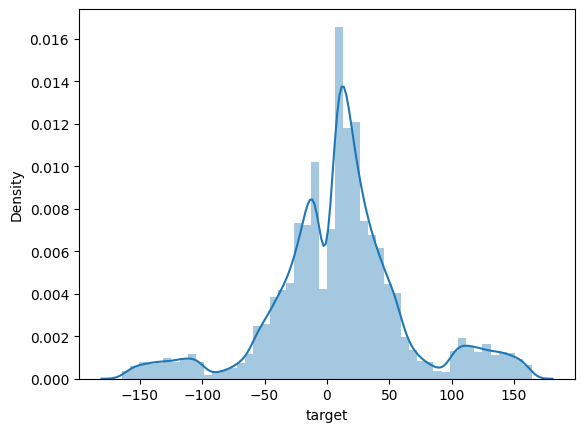

In [28]:
import seaborn as sns
sns.distplot(df["target"], kde=True)

In [29]:
fd = prepared_train_data(fd_train)
fd.head()

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target,duration
0,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,-141.0,9300.0
1,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,-20.0,10200.0
2,train_id_12,2016-01-20,TU 0913,TUN,MED,2016-01-20 19:40:00,2016-01-21 00:00:00,ATA,TU 320IMR,-34.0,15600.0
3,train_id_13,2016-01-21,TU 0217,IST,TUN,2016-01-21 20:10:00,2016-01-21 23:00:00,ATA,TU 320IMU,-36.0,10200.0
4,train_id_15,2016-01-22,TU 0706,CMN,TUN,2016-01-22 17:45:00,2016-01-22 20:10:00,ATA,TU 320IMR,-14.0,8700.0
